# Dispersion
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 6/13/2021|
|Updated | 7/2/2021|

## Root Mean Square as Standard Deviation

The **[root mean square](https://en.wikipedia.org/wiki/Root_mean_square)** (**rms**), also known as the *[quadratic mean](https://en.wikipedia.org/wiki/Generalized_mean#Quadratic)*, is defined as the square root of the [mean square](https://en.wikipedia.org/wiki/Mean_square).
For a continuous function (or waveform) $f(t)$, over the interval $T_1 \leq t \leq T_2$, the RMS can be [defined](https://en.wikipedia.org/wiki/Root_mean_square#Definition) as

$$
f_\text{RMS} = \left( \frac{1}{T_2 - T_1} \int_{T_1}^{T_2} [f(t)]^2 dt \right)^{1/2},
$$

where the RMS over all time of a periodic function is equal to its RMS over one period.

### Sine wave
If $f(t) = \sin t$, then its RMS over one period (i.e., the interval from $T_1 = 0$ to $T_2 = 2\pi$) is

\begin{align}
f_\text{rms} &= \left( \frac{1}{2\pi} \int_{0}^{2\pi} \sin^2t \, dt \right)^{1/2} \\
             &= \frac{1}{\sqrt{2\pi}}\left[ \frac{1}{2} \int_{0}^{2\pi} (1 - \cos(2t)) \, dt \right]^{1/2} \\
             &= \frac{1}{2\sqrt{\pi}}\left( \int_{0}^{2\pi}dt - \left[ \frac{\sin(2t)}{2} \right|_0^{2\pi}  \right)^{1/2} \\
             &= \frac{1}{2\sqrt{\pi}}(2\pi)^{1/2} = \boxed{\frac{1}{\sqrt2}}.
\end{align}

The arithmetic mean $\bar f$ of $\sin t$ is simply its average value over one period (i.e., its integral divided by the interval):

$$
\bar f = \frac{1}{2\pi} \int_0^{2\pi} \sin t \, dt = -\frac{\cos t}{2\pi} \, \bigg|_0^{2\pi} = 0.
$$

If $\sigma_f$ is the [__standard deviation__](https://en.wikipedia.org/wiki/Standard_deviation#Continuous_random_variable), then (from [here](https://en.wikipedia.org/wiki/Root_mean_square#Relationship_to_other_statistics))

\begin{equation}
f_\text{rms}^2 = \overline f^2 + \sigma_f^2 = \overline{f^2}.
\tag{1}
\end{equation}

But since $\bar f = 0$, the *RMS equals the standard deviation for a signal with zero mean*:

$$ \sigma_f = f_\text{rms} = \frac{1}{\sqrt{2}}.$$

## Mean & Variance

(From Louis Lyons, _A Practical Guide to Data Analysis for Physical Science Students_, Cambridge University Press, 1991.)

The true __mean__ $\mu$ (or average) and true __variance__  $\sigma^2$ (or mean square deviation from the mean) simply describe a distribution's 'center' and 'width'.
The _root mean square_ (__RMS__) _deviation from the mean_, or [__standard deviation__](https://en.wikipedia.org/wiki/Standard_deviation#Definition_of_population_values), is thus $\sigma$;
this is one measure of [__statistical dispersion__](https://en.wikipedia.org/wiki/Statistical_dispersion).
Only an infinite number of unbiased observations would yield these 'true' values.
However, for a finite set of $N$ observations, estimates of $\mu$ and $\sigma^2$ respectively are

$$
\bar x = \sum \frac{x_i}{N},
$$

and

$$
s^2 = \sum \frac{(x_i - \bar x)^2}{N}.
$$

From the definition of the average $\bar x$ above, we can define the _average of the squares_ as

$$
\overline{x^2} = \sum \frac{x_i^2}{N}.
$$

We can expand the numerator in the variance $s^2$ as follows:

\begin{align}
s^2 &= \sum \frac{x_i^2 - 2x_i\bar x + \bar x^2}{N} \\
    &= \sum \frac{x_i^2}{N} - 2\bar x\sum \frac{x_i}{N} + \sum_i^N \frac{\bar x^2}{N} \\
    &= \overline{x^2} - 2\bar x^2 + \bar x^2 \\
    &= \overline{x^2} - \bar x^2.
\end{align}

In other words, ___the variance equals the average of the square minus the square of the average___.
Compare this result with Eq. 1 above regarding the RMS.

## BA `np4` (Chao-Chin's 128x128)

In [1]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate

In [2]:
# From Athena++ input file
athinput = athena_read.athinput('athinput/cc-mod.athinput.si')
tlim = athinput['time']['tlim']              # max. simulation time
nx1 = athinput['mesh']['nx1']                # num. radial zones
nx2 = athinput['mesh']['nx2']                # num. vertical zones
nx3 = athinput['mesh']['nx3']                # num. azimuthal zones
MBnx1 = athinput['meshblock']['nx1']         # radial mesh block size
c_s = athinput['hydro']['iso_sound_speed']   # sound speed
Omega = athinput['problem']['omega']         # local Keplerian ang. freq.
tau_s = athinput['particles']['taus0']*Omega # dimensionless stopping time
Np_tot = athinput['problem']['npx1']\
    *athinput['problem']['npx2']\
    *athinput['problem']['npx3']             # total number of particles
Np = Np_tot/nx1/nx2/nx3
epsilon = athinput['problem']['epsilon']     # solid-to-gas ratio
Pi = athinput['problem']['duy0']             # global rad. press. grad.

# Code units and parameters
H = c_s / Omega                              # length (gas scale height)
T = 2*np.pi/Omega                            # time (orbital period)
etav_K = Pi*c_s                              # velocity (JY07)

# Collect Athena++ history file outputs
hst = athena_read.hst('hst/cc-mod.' + athinput["job"]["problem_id"] + '.hst')
times = hst['time']
dts = hst['dt']
rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2) / c_s # dust dens. amp.

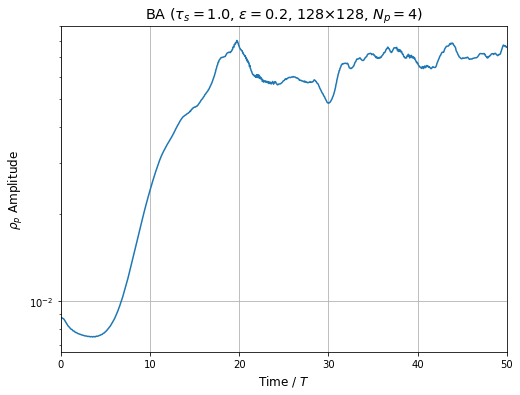

In [3]:
# Plot amplitude vs. time
fig, ax = plt.subplots(figsize=(8,6))
title = r'BA ($\tau_s=$%.1f, $\epsilon=$%.1f, %d$\times$%d, $N_p=$%d)'\
    %(tau_s, epsilon, nx1, nx2, Np)
ax.set_title(title, size='x-large')
ax.set_ylabel(r'$\rho_p$ Amplitude', size='large')
ax.set_xlabel(r'Time / $T$', size='large')
ax.semilogy(times, rhop_amps)
ax.set_xlim(0, tlim)
# ax.set_ylim(1e-3, 1e-1)
ax.grid()

From the plot, the saturated, turbulent state is reached by $t=20\,T$ orbital periods. As there are approximately 1000 `.hst` outputs over entire simulation (i.e., $0\,T \leq t \leq 50\,T$), $t \sim 20$ should correspond to an array index of $i = 1000 \times 20/50 = 400$.

In [4]:
i_sat = 400
t_sat = times[i_sat]
print('Saturation time at `times[%d]` = %.3f T' % (i_sat, t_sat,))

Saturation time at `times[400]` = 20.001 T


In [5]:
# time-averaged velocities during saturated state

vp1s, vp2s, vp3s = hst['vp1'], hst['vp2'], hst['vp3']
avg_vp1s = integrate.simpson(vp1s[i_sat:], times[i_sat:])/ (tlim - t_sat)\
    / etav_K / Np_tot
avg_vp2s = integrate.simpson(vp2s[i_sat:], times[i_sat:])/ (tlim - t_sat)\
    / etav_K / Np_tot
avg_vp3s = integrate.simpson(vp3s[i_sat:], times[i_sat:])/ (tlim - t_sat)\
    / etav_K / Np_tot
ref_vx = -0.52                              # 𝜂𝑣ₖ, from JY07, Table 2, BA run
ref_diff = 100*2*np.abs((avg_vp1s - ref_vx) / (avg_vp1s + ref_vx))

print(' ⟨𝑣_𝑥⟩ = %.3f 𝜂𝑣ₖ, %.1f%% diff w/ JY07,' % (avg_vp1s, ref_diff))
print(' ⟨𝑣_𝑦⟩ = %.3f 𝜂𝑣ₖ,' % (avg_vp3s))
print(' ⟨𝑣_𝑧⟩ =  %.3f 𝜂𝑣ₖ' % (avg_vp2s))

 ⟨𝑣_𝑥⟩ = -0.588 𝜂𝑣ₖ, 12.2% diff w/ JY07,
 ⟨𝑣_𝑦⟩ = -0.381 𝜂𝑣ₖ,
 ⟨𝑣_𝑧⟩ =  0.094 𝜂𝑣ₖ


In [6]:
ccm_nx1, ccm_nx2, ccm_nx3 = nx1, nx2, nx3
ccm_vx, ccm_vy, ccm_vz = avg_vp1s, avg_vp3s, avg_vp2s
ccm_nptot, ccm_np, ccm_diff, ccm_WT = Np_tot, Np, ref_diff, '12'
ccm_mb, ccm_times, ccm_rhops = MBnx1, times, rhop_amps

## BA `np4` (256x256)

In [7]:
# From Athena++ input file
athinput = athena_read.athinput('athinput/np4.athinput.si')
tlim = athinput['time']['tlim']              # max. simulation time
nx1 = athinput['mesh']['nx1']                # num. radial zones
nx2 = athinput['mesh']['nx2']                # num. vertical zones
nx3 = athinput['mesh']['nx3']                # num. azimuthal zones
MBnx1 = athinput['meshblock']['nx1']         # radial mesh block size
c_s = athinput['hydro']['iso_sound_speed']   # sound speed
Omega = athinput['problem']['omega']         # local Keplerian ang. freq.
tau_s = athinput['particles']['taus0']*Omega # dimensionless stopping time
Np_tot = athinput['problem']['npx1']\
    *athinput['problem']['npx2']\
    *athinput['problem']['npx3']             # total number of particles
Np = Np_tot/nx1/nx2/nx3
epsilon = athinput['problem']['epsilon']     # solid-to-gas ratio
Pi = athinput['problem']['duy0']             # global rad. press. grad.

# Code units and parameters
H = c_s / Omega                              # length (gas scale height)
T = 2*np.pi/Omega                            # time (orbital period)
etav_K = Pi*c_s                              # velocity (JY07)

# Collect Athena++ history file outputs
hst = athena_read.hst('hst/np4.' + athinput["job"]["problem_id"] + '.hst')
times = hst['time']
dts = hst['dt']
rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2) / c_s # dust dens. amp.

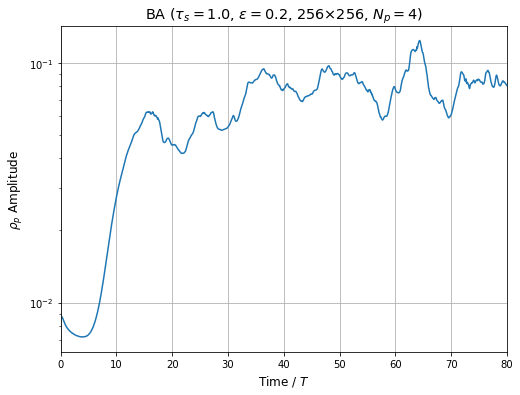

In [8]:
# Plot amplitude vs. time
fig, ax = plt.subplots(figsize=(8,6))
title = r'BA ($\tau_s=$%.1f, $\epsilon=$%.1f, %d$\times$%d, $N_p=$%d)'\
    %(tau_s, epsilon, nx1, nx2, Np)
ax.set_title(title, size='x-large')
ax.set_ylabel(r'$\rho_p$ Amplitude', size='large')
ax.set_xlabel(r'Time / $T$', size='large')
ax.semilogy(times, rhop_amps)
ax.set_xlim(0, tlim)
# ax.set_ylim(1e-3, 1e-1)
ax.grid()

In [9]:
i_sat = 187
t_sat = times[i_sat]
print('Saturation time at `times[%d]` = %.3f T' % (i_sat, t_sat,))

Saturation time at `times[187]` = 14.960 T


In [10]:
# time-averaged velocities during saturated state

vp1s, vp2s, vp3s = hst['vp1'], hst['vp2'], hst['vp3']
avg_vp1s = integrate.simpson(vp1s[i_sat:], times[i_sat:])/ (tlim - t_sat)\
    / etav_K / Np_tot
avg_vp2s = integrate.simpson(vp2s[i_sat:], times[i_sat:])/ (tlim - t_sat)\
    / etav_K / Np_tot
avg_vp3s = integrate.simpson(vp3s[i_sat:], times[i_sat:])/ (tlim - t_sat)\
    / etav_K / Np_tot
ref_vx = -0.52                              # 𝜂𝑣ₖ, from JY07, Table 2, BA run
ref_diff = 100*2*np.abs((avg_vp1s - ref_vx) / (avg_vp1s + ref_vx))

print(' ⟨𝑣_𝑥⟩ = %.3f 𝜂𝑣ₖ, %.1f%% diff w/ JY07,' % (avg_vp1s, ref_diff))
print(' ⟨𝑣_𝑦⟩ = %.3f 𝜂𝑣ₖ,' % (avg_vp3s))
print(' ⟨𝑣_𝑧⟩ = %.3f 𝜂𝑣ₖ' % (avg_vp2s))

 ⟨𝑣_𝑥⟩ = -0.578 𝜂𝑣ₖ, 10.5% diff w/ JY07,
 ⟨𝑣_𝑦⟩ = -0.377 𝜂𝑣ₖ,
 ⟨𝑣_𝑧⟩ = -0.006 𝜂𝑣ₖ


In [11]:
np4_nx1, np4_nx2, np4_nx3 = nx1, nx2, nx3
np4_vx, np4_vy, np4_vz = avg_vp1s, avg_vp3s, avg_vp2s
np4_nptot, np4_np, np4_diff, np4_WT = Np_tot, Np, ref_diff, '41'
np4_mb, np4_times, np4_rhops = MBnx1, times, rhop_amps

## BA `np9`

In [12]:
# From Athena++ input file
athinput = athena_read.athinput('athinput/np9.athinput.si')
tlim = athinput['time']['tlim']              # max. simulation time
nx1 = athinput['mesh']['nx1']                # num. radial zones
nx2 = athinput['mesh']['nx2']                # num. vertical zones
nx3 = athinput['mesh']['nx3']                # num. azimuthal zones
MBnx1 = athinput['meshblock']['nx1']         # radial mesh block size
c_s = athinput['hydro']['iso_sound_speed']   # sound speed
Omega = athinput['problem']['omega']         # local Keplerian ang. freq.
tau_s = athinput['particles']['taus0']*Omega # dimensionless stopping time
Np_tot = athinput['problem']['npx1']\
    *athinput['problem']['npx2']\
    *athinput['problem']['npx3']             # total number of particles
Np = Np_tot/nx1/nx2/nx3
epsilon = athinput['problem']['epsilon']     # solid-to-gas ratio
Pi = athinput['problem']['duy0']             # global rad. press. grad.

# Code units and parameters
H = c_s / Omega                              # length (gas scale height)
T = 2*np.pi/Omega                            # time (orbital period)
etav_K = Pi*c_s                              # velocity (JY07)

# Collect Athena++ history file outputs
hst = athena_read.hst('hst/np9.' + athinput["job"]["problem_id"] + '.hst')
times = hst['time']
dts = hst['dt']
rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2) / c_s # dust dens. amp.

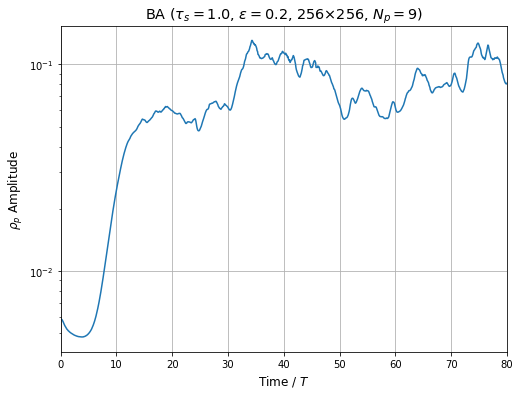

In [13]:
# Plot amplitude vs. time
fig, ax = plt.subplots(figsize=(8,6))
title = r'BA ($\tau_s=$%.1f, $\epsilon=$%.1f, %d$\times$%d, $N_p=$%d)'\
    %(tau_s, epsilon, nx1, nx2, Np)
ax.set_title(title, size='x-large')
ax.set_ylabel(r'$\rho_p$ Amplitude', size='large')
ax.set_xlabel(r'Time / $T$', size='large')
ax.semilogy(times, rhop_amps)
ax.set_xlim(0, tlim)
# ax.set_ylim(1e-3, 1e-1)
ax.grid()

In [14]:
i_sat = 187
t_sat = times[i_sat]
print('Saturation time at `times[%d]` = %.3f T' % (i_sat, t_sat,))

Saturation time at `times[187]` = 14.960 T


In [15]:
# time-averaged velocities during saturated state

vp1s, vp2s, vp3s = hst['vp1'], hst['vp2'], hst['vp3']
avg_vp1s = integrate.simpson(vp1s[i_sat:], times[i_sat:])/ (tlim - t_sat)\
    / etav_K / Np_tot
avg_vp2s = integrate.simpson(vp2s[i_sat:], times[i_sat:])/ (tlim - t_sat)\
    / etav_K / Np_tot
avg_vp3s = integrate.simpson(vp3s[i_sat:], times[i_sat:])/ (tlim - t_sat)\
    / etav_K / Np_tot
ref_vx = -0.52                              # 𝜂𝑣ₖ, from JY07, Table 2, BA run
ref_diff = 100*2*np.abs((avg_vp1s - ref_vx) / (avg_vp1s + ref_vx))

print(' ⟨𝑣_𝑥⟩ = %.3f 𝜂𝑣ₖ, %.1f%% diff w/ JY07,' % (avg_vp1s, ref_diff))
print(' ⟨𝑣_𝑦⟩ = %.3f 𝜂𝑣ₖ,' % (avg_vp3s))
print(' ⟨𝑣_𝑧⟩ = %.3f 𝜂𝑣ₖ' % (avg_vp2s))

 ⟨𝑣_𝑥⟩ = -0.568 𝜂𝑣ₖ, 8.8% diff w/ JY07,
 ⟨𝑣_𝑦⟩ = -0.371 𝜂𝑣ₖ,
 ⟨𝑣_𝑧⟩ = -0.102 𝜂𝑣ₖ


In [16]:
np9_nx1, np9_nx2, np9_nx3 = nx1, nx2, nx3
np9_vx, np9_vy, np9_vz = avg_vp1s, avg_vp3s, avg_vp2s
np9_nptot, np9_np, np9_diff, np9_WT = Np_tot, Np, ref_diff, '85'
np9_mb, np9_times, np9_rhops = MBnx1, times, rhop_amps

## BA `np16`

In [17]:
# From Athena++ input file
athinput = athena_read.athinput('athinput/np16.athinput.si')
tlim = athinput['time']['tlim']              # max. simulation time
nx1 = athinput['mesh']['nx1']                # num. radial zones
nx2 = athinput['mesh']['nx2']                # num. vertical zones
nx3 = athinput['mesh']['nx3']                # num. azimuthal zones
MBnx1 = athinput['meshblock']['nx1']         # radial mesh block size
c_s = athinput['hydro']['iso_sound_speed']   # sound speed
Omega = athinput['problem']['omega']         # local Keplerian ang. freq.
tau_s = athinput['particles']['taus0']*Omega # dimensionless stopping time
Np_tot = athinput['problem']['npx1']\
    *athinput['problem']['npx2']\
    *athinput['problem']['npx3']             # total number of particles
Np = Np_tot/nx1/nx2/nx3
epsilon = athinput['problem']['epsilon']     # solid-to-gas ratio
Pi = athinput['problem']['duy0']             # global rad. press. grad.

# Code units and parameters
H = c_s / Omega                              # length (gas scale height)
T = 2*np.pi/Omega                            # time (orbital period)
etav_K = Pi*c_s                              # velocity (JY07)

# Collect Athena++ history file outputs
hst = athena_read.hst('hst/np16.' + athinput["job"]["problem_id"] + '.hst')
times = hst['time']
dts = hst['dt']
rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2) / c_s # dust dens. amp.

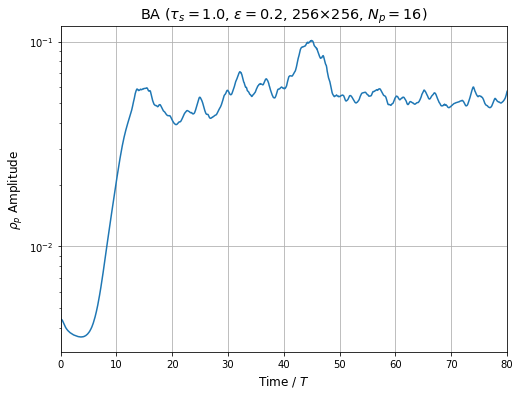

In [18]:
# Plot amplitude vs. time
fig, ax = plt.subplots(figsize=(8,6))
title = r'BA ($\tau_s=$%.1f, $\epsilon=$%.1f, %d$\times$%d, $N_p=$%d)'\
    %(tau_s, epsilon, nx1, nx2, Np)
ax.set_title(title, size='x-large')
ax.set_ylabel(r'$\rho_p$ Amplitude', size='large')
ax.set_xlabel(r'Time / $T$', size='large')
ax.semilogy(times, rhop_amps)
ax.set_xlim(0, tlim)
# ax.set_ylim(1e-3, 1e-1)
ax.grid()

In [19]:
i_sat = 187
t_sat = times[i_sat]
print('Saturation time at `times[%d]` = %.3f T' % (i_sat, t_sat,))

Saturation time at `times[187]` = 14.960 T


In [20]:
# time-averaged velocities during saturated state

vp1s, vp2s, vp3s = hst['vp1'], hst['vp2'], hst['vp3']
avg_vp1s = integrate.simpson(vp1s[i_sat:], times[i_sat:])/ (tlim - t_sat)\
    / etav_K / Np_tot
avg_vp2s = integrate.simpson(vp2s[i_sat:], times[i_sat:])/ (tlim - t_sat)\
    / etav_K / Np_tot
avg_vp3s = integrate.simpson(vp3s[i_sat:], times[i_sat:])/ (tlim - t_sat)\
    / etav_K / Np_tot
ref_vx = -0.52                              # 𝜂𝑣ₖ, from JY07, Table 2, BA run
ref_diff = 100*2*np.abs((avg_vp1s - ref_vx) / (avg_vp1s + ref_vx))

print(' ⟨𝑣_𝑥⟩ = %.3f 𝜂𝑣ₖ, %.1f%% diff w/ JY07,' % (avg_vp1s, ref_diff))
print(' ⟨𝑣_𝑦⟩ = %.3f 𝜂𝑣ₖ,' % (avg_vp3s))
print(' ⟨𝑣_𝑧⟩ =  %.3f 𝜂𝑣ₖ' % (avg_vp2s))

 ⟨𝑣_𝑥⟩ = -0.642 𝜂𝑣ₖ, 21.0% diff w/ JY07,
 ⟨𝑣_𝑦⟩ = -0.407 𝜂𝑣ₖ,
 ⟨𝑣_𝑧⟩ =  0.040 𝜂𝑣ₖ


In [21]:
np16_nx1, np16_nx2, np16_nx3 = nx1, nx2, nx3
np16_vx, np16_vy, np16_vz = avg_vp1s, avg_vp3s, avg_vp2s
np16_nptot, np16_np, np16_diff, np16_WT = Np_tot, Np, ref_diff, '121'
np16_mb, np16_times, np16_rhops = MBnx1, times, rhop_amps

## BA `np25`

In [22]:
# From Athena++ input file
athinput = athena_read.athinput('athinput/np25.athinput.si')
tlim = athinput['time']['tlim']              # max. simulation time
nx1 = athinput['mesh']['nx1']                # num. radial zones
nx2 = athinput['mesh']['nx2']                # num. vertical zones
nx3 = athinput['mesh']['nx3']                # num. azimuthal zones
MBnx1 = athinput['meshblock']['nx1']         # radial mesh block size
c_s = athinput['hydro']['iso_sound_speed']   # sound speed
Omega = athinput['problem']['omega']         # local Keplerian ang. freq.
tau_s = athinput['particles']['taus0']*Omega # dimensionless stopping time
Np_tot = athinput['problem']['npx1']\
    *athinput['problem']['npx2']\
    *athinput['problem']['npx3']             # total number of particles
Np = Np_tot/nx1/nx2/nx3
epsilon = athinput['problem']['epsilon']     # solid-to-gas ratio
Pi = athinput['problem']['duy0']             # global rad. press. grad.

# Code units and parameters
H = c_s / Omega                              # length (gas scale height)
T = 2*np.pi/Omega                            # time (orbital period)
etav_K = Pi*c_s                              # velocity (JY07)

# Collect Athena++ history file outputs
hst = athena_read.hst('hst/np25.' + athinput["job"]["problem_id"] + '.hst')
times = hst['time']
dts = hst['dt']
rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2) / c_s # dust dens. amp.

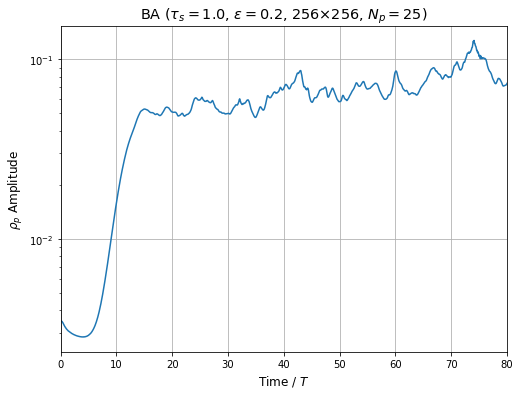

In [23]:
# Plot amplitude vs. time
fig, ax = plt.subplots(figsize=(8,6))
title = r'BA ($\tau_s=$%.1f, $\epsilon=$%.1f, %d$\times$%d, $N_p=$%d)'\
    %(tau_s, epsilon, nx1, nx2, Np)
ax.set_title(title, size='x-large')
ax.set_ylabel(r'$\rho_p$ Amplitude', size='large')
ax.set_xlabel(r'Time / $T$', size='large')
ax.semilogy(times, rhop_amps)
ax.set_xlim(0, tlim)
# ax.set_ylim(1e-3, 1e-1)
ax.grid()

In [24]:
i_sat = 187
t_sat = times[i_sat]
print('Saturation time at `times[%d]` = %.3f T' % (i_sat, t_sat,))

Saturation time at `times[187]` = 14.960 T


In [25]:
# time-averaged velocities during saturated state

vp1s, vp2s, vp3s = hst['vp1'], hst['vp2'], hst['vp3']
avg_vp1s = integrate.simpson(vp1s[i_sat:], times[i_sat:])/ (tlim - t_sat)\
    / etav_K / Np_tot
avg_vp2s = integrate.simpson(vp2s[i_sat:], times[i_sat:])/ (tlim - t_sat)\
    / etav_K / Np_tot
avg_vp3s = integrate.simpson(vp3s[i_sat:], times[i_sat:])/ (tlim - t_sat)\
    / etav_K / Np_tot
ref_vx = -0.52                              # 𝜂𝑣ₖ, from JY07, Table 2, BA run
ref_diff = 100*2*np.abs((avg_vp1s - ref_vx) / (avg_vp1s + ref_vx))

print(' ⟨𝑣_𝑥⟩ = %.3f 𝜂𝑣ₖ, %.1f%% diff w/ JY07,' % (avg_vp1s, ref_diff))
print(' ⟨𝑣_𝑦⟩ = %.3f 𝜂𝑣ₖ,' % (avg_vp3s))
print(' ⟨𝑣_𝑧⟩ =  %.3f 𝜂𝑣ₖ' % (avg_vp2s))

 ⟨𝑣_𝑥⟩ = -0.581 𝜂𝑣ₖ, 11.1% diff w/ JY07,
 ⟨𝑣_𝑦⟩ = -0.383 𝜂𝑣ₖ,
 ⟨𝑣_𝑧⟩ =  -0.080 𝜂𝑣ₖ


In [26]:
np25_nx1, np25_nx2, np25_nx3 = nx1, nx2, nx3
np25_vx, np25_vy, np25_vz = avg_vp1s, avg_vp3s, avg_vp2s
np25_nptot, np25_np, np25_diff, np25_WT = Np_tot, Np, ref_diff, '< 213*'
np25_mb, np25_times, np25_rhops = MBnx1, times, rhop_amps

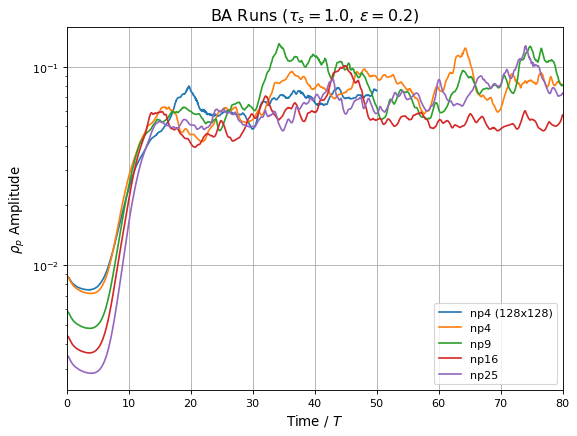

In [27]:
# Plot amplitudes vs. times
fig, ax = plt.subplots(figsize=(8,6), dpi=80)
title = r'BA Runs ($\tau_s=$%.1f, $\epsilon=$%.1f)'%(tau_s, epsilon)
ax.set_title(title, size='x-large')
ax.set_ylabel(r'$\rho_p$ Amplitude', size='large')
ax.set_xlabel(r'Time / $T$', size='large')
ax.semilogy(ccm_times, ccm_rhops, label="np4 (128x128)")
ax.semilogy(np4_times, np4_rhops, label="np4")
ax.semilogy(np9_times, np9_rhops, label="np9")
ax.semilogy(np16_times, np16_rhops, label="np16")
ax.semilogy(np25_times, np25_rhops, label="np25")
ax.set_xlim(0, tlim)
ax.legend()
# ax.set_ylim(1e-3, 1e-1)
ax.grid()

- [**Poisson noise**](https://en.wikipedia.org/wiki/Shot_noise)
  - Small-number particle simulations exhibit undue statistical fluctuations.
  - The signal-to-noise ratio $\text{SNR} = \sqrt{N}$, where $N$ is the average number of events.

In [28]:
df = pd.DataFrame(
    {
        "Run": [
            "BA", "BA", "BA", "BA", "BA",
        ],
        r"$N_x \times N_y \times N_z$": [
            r"${%d} \times {%d} \times {%d}$"%(ccm_nx1, ccm_nx3, ccm_nx2),
            r"${%d} \times {%d} \times {%d}$"%(np4_nx1, np4_nx3, np4_nx2),
            r"${%d} \times {%d} \times {%d}$"%(np9_nx1, np9_nx3, np9_nx2),
            r"${%d} \times {%d} \times {%d}$"%(np16_nx1, np16_nx3, np16_nx2),
            r"${%d} \times {%d} \times {%d}$"%(np25_nx1, np25_nx3, np25_nx2),
        ],
        r"$N_p$": [ccm_nptot, np4_nptot, np9_nptot, np16_nptot, np25_nptot],
        "np": [ccm_np, np4_np, np9_np, np16_np, np25_np],
        r"$\overline{v_x}$": [ccm_vx, np4_vx, np9_vx, np16_vx, np25_vx],
        "% diff (JY07)": [ccm_diff, np4_diff, np9_diff, np16_diff, np25_diff],
        r"$\overline{v_y}$": [ccm_vy, np4_vy, np9_vy, np16_vy, np25_vy],
        r"$\overline{v_z}$": [ccm_vz, np4_vz, np9_vz, np16_vz, np25_vz],
        "CPUs": [16, 64, 64, 64, 256],
        "Meshblock": [ccm_mb, np4_mb, np9_mb, np16_mb, np25_mb],
        "Walltime (min)": [ccm_WT, np4_WT, np9_WT, np16_WT, np25_WT]
    }
)
df.style.format({
    r"$N_p$": "{:.1e}",
    "np": "{:.0f}",
    r"$\overline{v_x}$": "{:.3f}",
    "% diff (JY07)": "{:.1f}",
    r"$\overline{v_y}$": "{:.3f}",
    r"$\overline{v_z}$": "{:.3f}",
    "Meshblock": "{:d}²"
})

,Run,$N_x \times N_y \times N_z$,$N_p$,np,$\overline{v_x}$,% diff (JY07),$\overline{v_y}$,$\overline{v_z}$,CPUs,Meshblock,Walltime (min)
0,BA,${128} \times {1} \times {128}$,6.6e+04,4,-0.588,12.2,-0.381,0.094,16,32²,12
1,BA,${256} \times {1} \times {256}$,2.6e+05,4,-0.578,10.5,-0.377,-0.006,64,32²,41
2,BA,${256} \times {1} \times {256}$,5.9e+05,9,-0.568,8.8,-0.371,-0.102,64,32²,85
3,BA,${256} \times {1} \times {256}$,1.0e+06,16,-0.642,21.0,-0.407,0.040,64,32²,121
4,BA,${256} \times {1} \times {256}$,1.6e+06,25,-0.581,11.1,-0.383,-0.080,256,16²,< 213*


## Tasks
- [x] Dispersion
  - [x] Read Wiki articles
  - [x] Sine (over one period)
  - [x] Calculate standard deviation of sine function over one period
- [x] Use .hst output (time-averaged during saturated state)
- [x] Think (carefully) about what time-averaged means and how to compute
- [x] May not be appreciable effect (0.005% difference)
- [x] Account for non-evenly spaced times (due to dt)
  - [x] Integrate (sum dt’s) vs. …
  - [x] Divide by discrete sample size (array indices)
- [x] Check pgen for quantities (requires conversion to desired units)
- [x] Prove: variance = avg. of sqs. minus sq. of avgs.
- [x] For each component (x, y, z)
- [x] Add’l BA runs (256 x 256)
  - [x] Try w/ even multiple of dt  for output2 vs. output3 (see FIXED.np4)
  - [x] Redo np9/np25 (extend walltime)
- [x] Velocity dispersion for np16
  - [x] High % diff
  - [x] Try different i_sat
- [x] np25, run4
  - [x] Make -t 30 min earlier (3:30:00)
  - [x] Restart w/ 4 hr walltime
  - [x] sup & plot
- [x] Make table similar to Table 2 comparing runs
  - [x] Add cols: N_p (before np), meshblock size (after CPUs)
  - [x] Compare runtimes for np4 - np25 runs
- [x] Compare saturation levels (occurrence time is stochastic)
